# <center> EDA-Penguin_DS </center>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data set
data=pd.read_csv("penguins_size.csv")

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
data.shape

(344, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Getting details of null values

In [7]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
data[data.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
data[data['culmen_depth_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

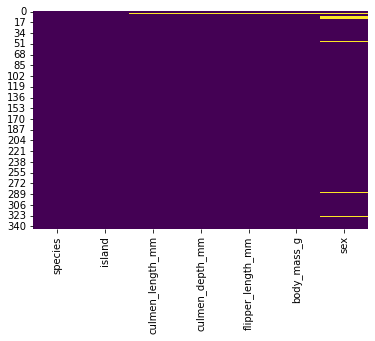

In [11]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

### Data Cleaning

In [12]:
data['culmen_length_mm'].fillna((data['culmen_length_mm'].median()), inplace=True)

In [13]:
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].median()), inplace=True)

In [14]:
data['flipper_length_mm'].fillna((data['flipper_length_mm'].median()), inplace=True)

In [15]:
data['body_mass_g'].fillna((data['body_mass_g'].median()), inplace=True)

In [16]:
data['sex'].fillna((data['sex'].mode()[0]), inplace=True)

In [17]:
data['sex'].replace('.',data['sex'].mode()[0],inplace=True)

In [18]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:>

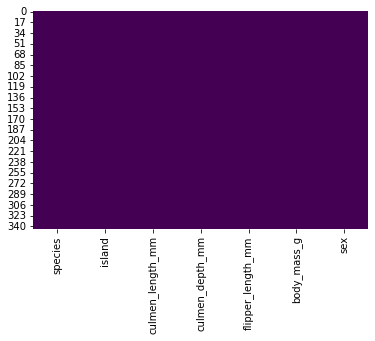

In [19]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [20]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Corelation 

In [21]:
corr=data.corr()
corr

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


<AxesSubplot:>

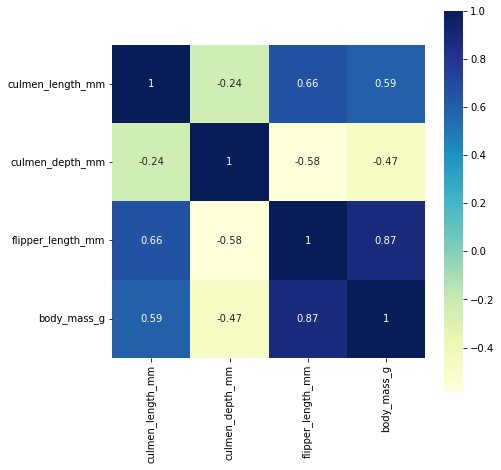

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(data=corr,annot=True,square=True,cmap="YlGnBu")

## Outlier Detection

[Text(0.5, 1.0, 'Box Plot of columns')]

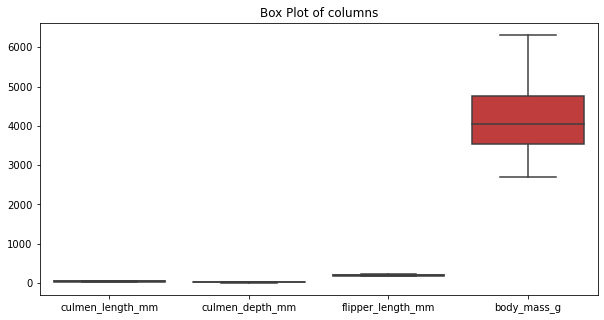

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data).set(title="Box Plot of columns")

__There are no outliers in the columns__

### Data visualisation

<AxesSubplot:xlabel='sex', ylabel='count'>

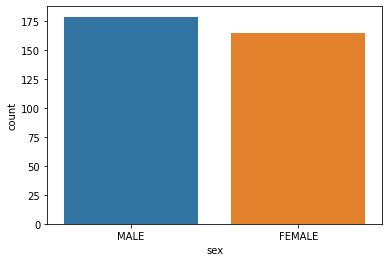

In [24]:
sns.countplot(data=data,x='sex')

In [25]:
data['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [26]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [27]:
data['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Torgersen'), Text(1, 0, 'Biscoe'), Text(2, 0, 'Dream')])

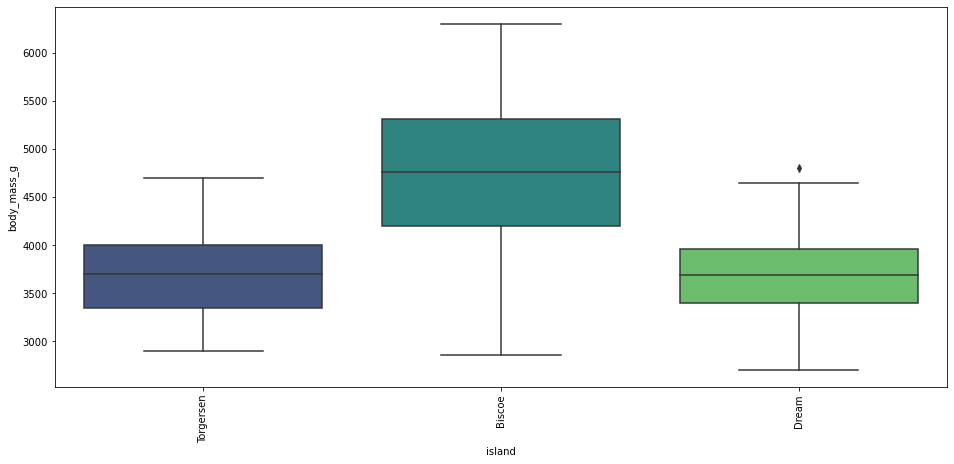

In [28]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=data, x='island', y='body_mass_g', palette='viridis', width=0.8)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')])

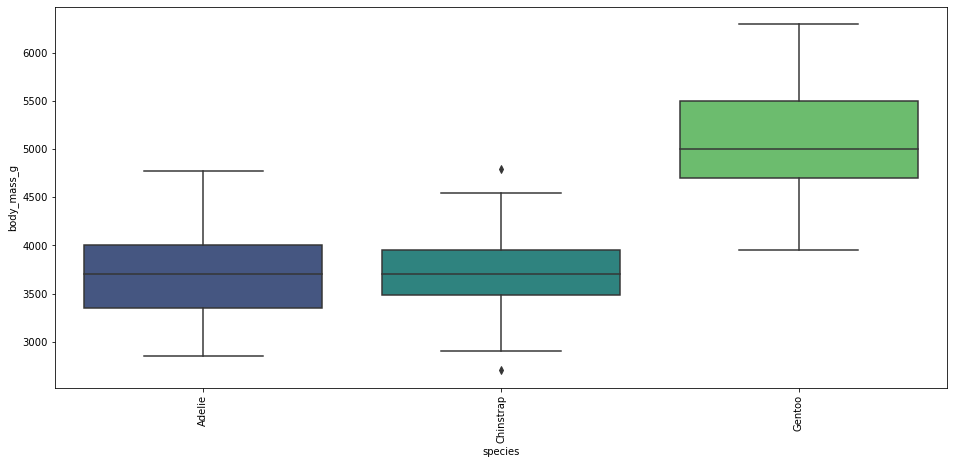

In [29]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=data, x='species', y='body_mass_g', palette='viridis', width=0.8,)
plt.xticks(rotation=90)

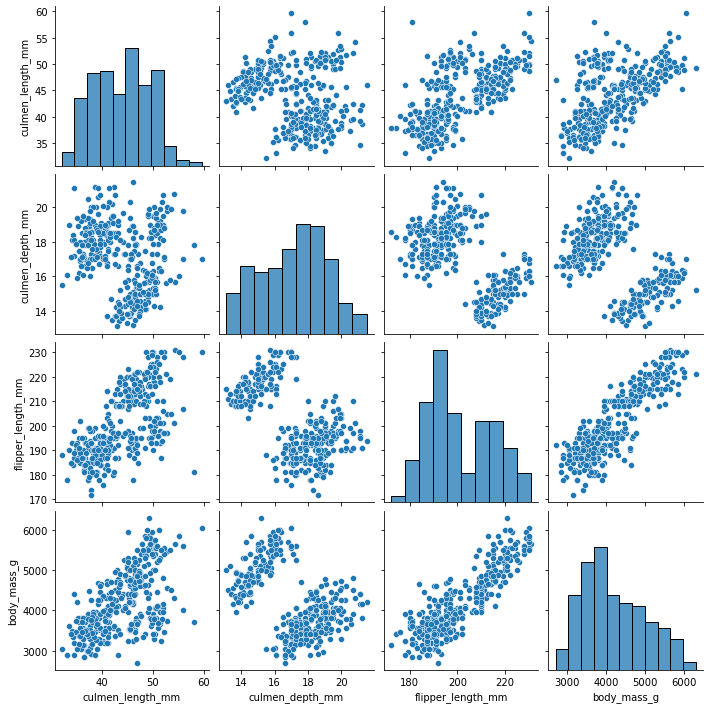

In [30]:
sns.pairplot(data)

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

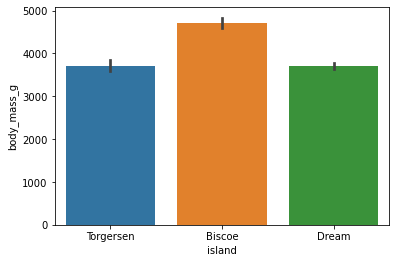

In [31]:
sns.barplot(x = 'island',y = 'body_mass_g',data = data)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

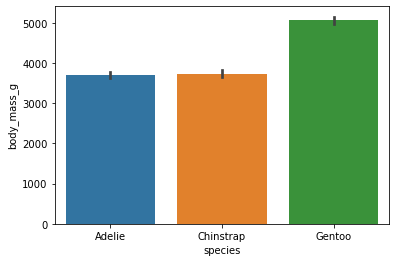

In [32]:
sns.barplot(x = 'species',y = 'body_mass_g',data = data)

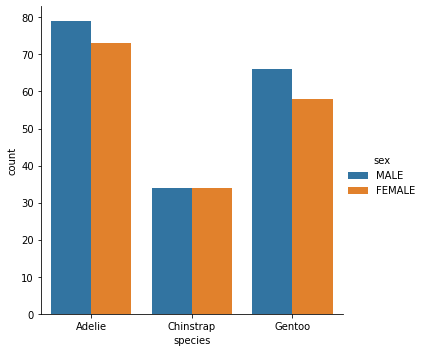

In [33]:
sns.factorplot('species', hue='sex', kind='count', data=data)

In [34]:
data.groupby(['species','sex'])['species'].count()

species    sex   
Adelie     FEMALE    73
           MALE      79
Chinstrap  FEMALE    34
           MALE      34
Gentoo     FEMALE    58
           MALE      66
Name: species, dtype: int64

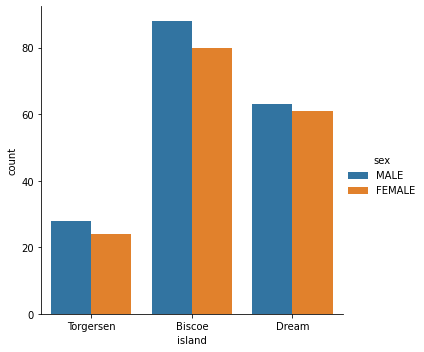

In [35]:
sns.factorplot('island', hue='sex', kind='count', data=data)

In [36]:
data.groupby(['island','sex'])['species'].count()

island     sex   
Biscoe     FEMALE    80
           MALE      88
Dream      FEMALE    61
           MALE      63
Torgersen  FEMALE    24
           MALE      28
Name: species, dtype: int64

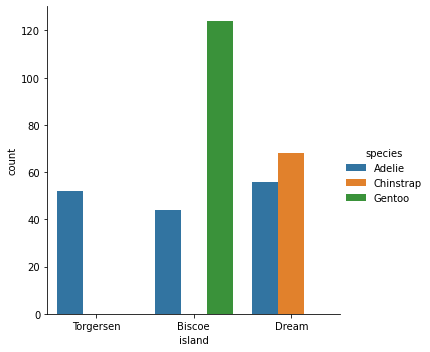

In [37]:
sns.factorplot('island', hue='species', kind='count', data=data)

In [38]:
data.groupby(['island','species','sex'])['sex'].count()

island     species    sex   
Biscoe     Adelie     FEMALE    22
                      MALE      22
           Gentoo     FEMALE    58
                      MALE      66
Dream      Adelie     FEMALE    27
                      MALE      29
           Chinstrap  FEMALE    34
                      MALE      34
Torgersen  Adelie     FEMALE    24
                      MALE      28
Name: sex, dtype: int64

__From above analysis we can see that no three species are together on one island__

## Relation Between Numerical columns

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

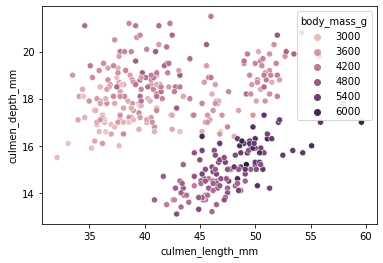

In [39]:
sns.scatterplot('culmen_length_mm','culmen_depth_mm',hue='body_mass_g',data=data)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

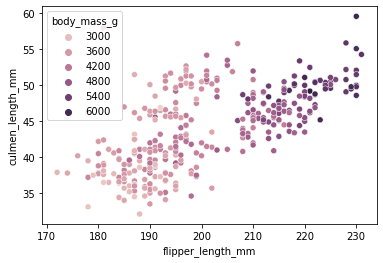

In [40]:
sns.scatterplot('flipper_length_mm','culmen_length_mm',hue='body_mass_g',data=data)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_depth_mm'>

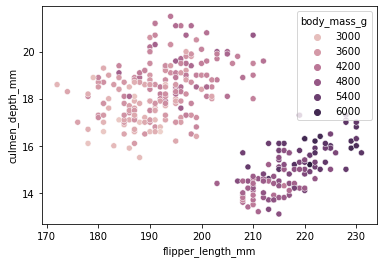

In [41]:
sns.scatterplot('flipper_length_mm','culmen_depth_mm',hue='body_mass_g',data=data)

__Conclusion__
1. The number of __male__ species is __more__ than __female__
2. No more then two species are available on a single island
3. on __Island Bisco species 'Gentoo'__ are present in __highest__ no and overall large no of species is present here
4. __Torgersen island__ has __lowest__ no of overall __species__
5. __Gentoo species__ has __highest__ of all __body mass__
6. flpper_length,culmen_length are __highly corealted__ to __body mass__ 
7. __Adelie species is largest among all in no__